# Explore Exercises

Exercises
Sourcing the Zillow database as the data source, create a jupyter notebook named `explore_zillow` and do the following:

1. Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

2. Answer those questions through a mix of statistical tests and visualizations.

Bonus:

Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.



In [1]:
# regular imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import acquire
import prep

import warnings
warnings.filterwarnings('ignore')

In [2]:
# acquire
df = acquire.get_zillow_data()

In [3]:
# prepare
df = prep.prepare_zillow(df)

In [4]:
# split
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = prep.train_validate_test(df, 'logerror')

**Goals of exploration**

- Can we see patterns, find signals in the data? 

- What features are driving the outcome?

- Are there other features we can construct that have stronger relationships? 

- Use Visualization and statistical testing to help answer these questions. 

- We want to walk away from exploration with with modeling strategies (feature selection, algorithm selection, evaluation methods, for example).  

**Agenda**

- Wrangle data (acquire, prep, summarize, split)

- Identify questions to answer, hypotheses to test.

In [5]:
# planned, acquired, prepped
# we are exploring

In [6]:
train.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
20861,261.0,14327133,1908205,2.5,3.0,2.5,2305.0,2305.0,6059.0,2.0,...,2003.0,419746.0,1725925.0,2016.0,1306179.0,21899.16,6.059063e+13,0.016509,2017-03-28,Single Family Residential
65249,261.0,12118853,2243290,3.0,3.0,3.0,2746.0,2746.0,6037.0,3.0,...,1926.0,404440.0,898274.0,2016.0,493834.0,10444.06,6.037463e+13,0.081133,2017-08-10,Single Family Residential
43544,261.0,14158628,861795,1.0,3.0,1.0,1161.0,1161.0,6059.0,1.0,...,1953.0,40629.0,478000.0,2016.0,437371.0,5528.26,6.059002e+13,-0.018976,2017-06-05,Single Family Residential
589,261.0,13980139,1218864,2.5,4.0,2.5,1550.0,1550.0,6059.0,2.0,...,1955.0,72897.0,994464.0,2016.0,921567.0,10801.82,6.059063e+13,0.033034,2017-01-04,Single Family Residential
44756,261.0,10917554,837256,2.0,2.0,2.0,1502.0,1502.0,6037.0,2.0,...,1962.0,142282.0,711411.0,2016.0,569129.0,8601.88,6.037144e+13,0.019062,2017-06-08,Single Family Residential


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28103 entries, 20861 to 24803
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         28103 non-null  float64
 1   parcelid                      28103 non-null  int64  
 2   id                            28103 non-null  int64  
 3   bathroomcnt                   28103 non-null  float64
 4   bedroomcnt                    28103 non-null  float64
 5   calculatedbathnbr             28103 non-null  float64
 6   calculatedfinishedsquarefeet  28103 non-null  float64
 7   finishedsquarefeet12          28103 non-null  float64
 8   fips                          28103 non-null  float64
 9   fullbathcnt                   28103 non-null  float64
 10  latitude                      28103 non-null  float64
 11  longitude                     28103 non-null  float64
 12  lotsizesquarefeet             28103 non-null  float64
 1

In [8]:
# in the scope of exploration:
# - frame questions with our tools:
# - univariate exploration
# - bivariate exploration
# - multivariate exploration


# 1. univariate explorate
# - What are the distributions of each variables? 


# 2. Bivariate:
# - Does logerror score vary across fips


# 3. Bivariate:
# - Is there a relationship between logerror and bedroom count?


# 4. Is there a relationship between logerror and bathroom count?


# multivariate:
# 5. If we control for calculatedfinishedsqft, does logerror differ across tax amount

# 6. If we control for fullbathcnt, does logerror differ across yearbuilt?

1. univariate explorate
- What are the distributions of each variables? 

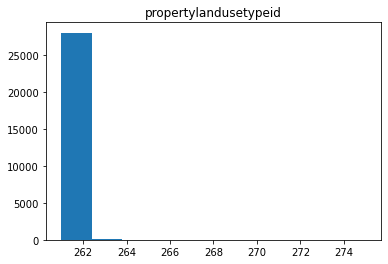

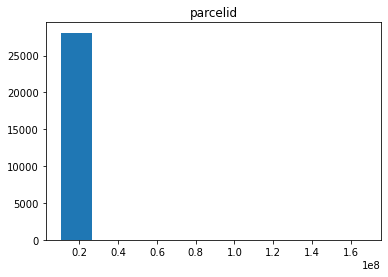

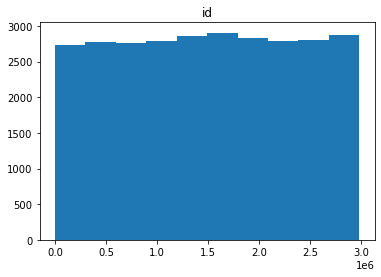

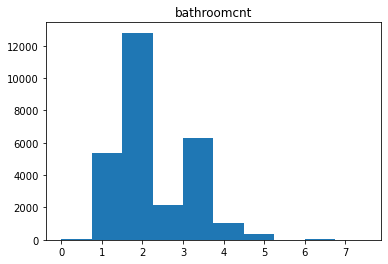

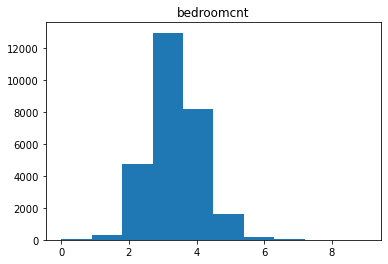

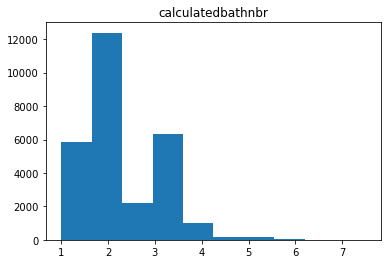

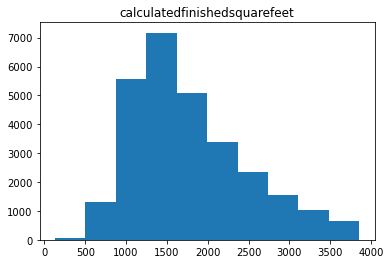

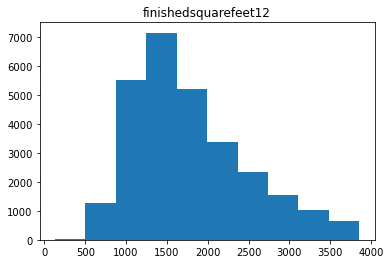

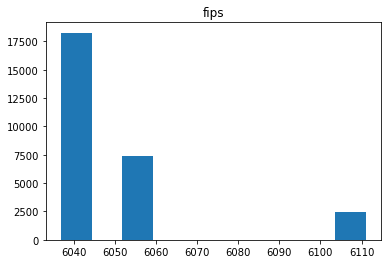

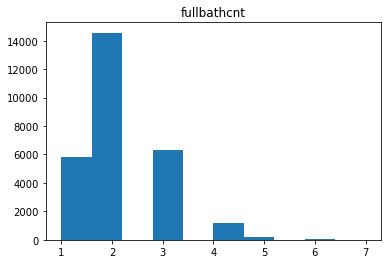

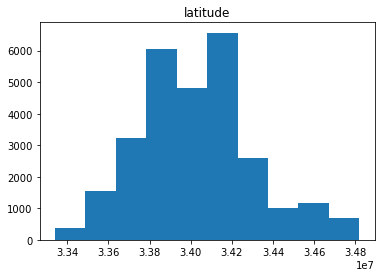

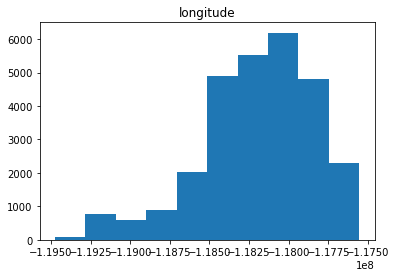

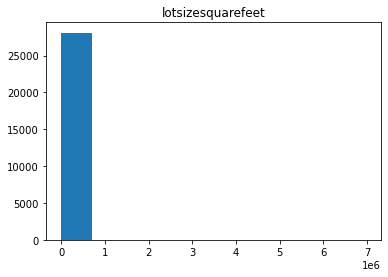

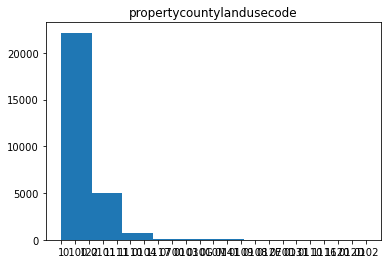

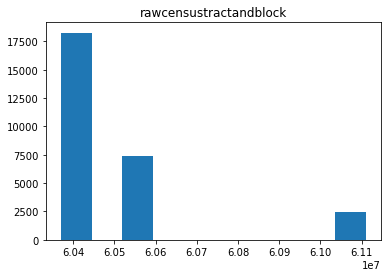

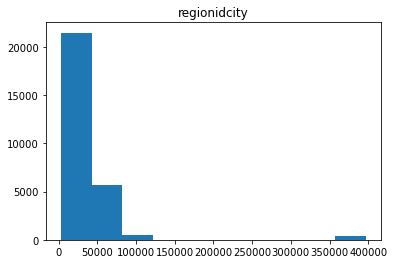

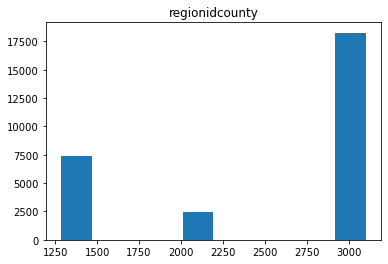

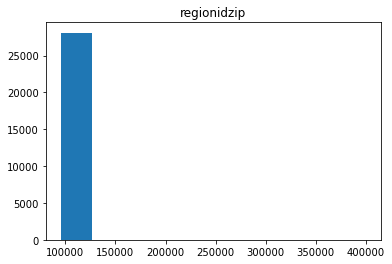

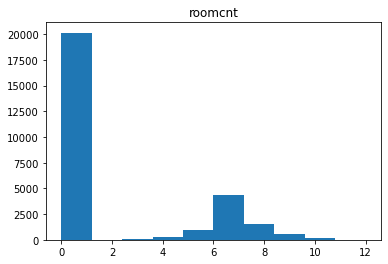

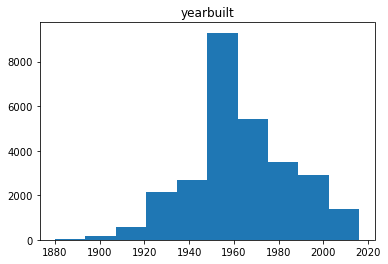

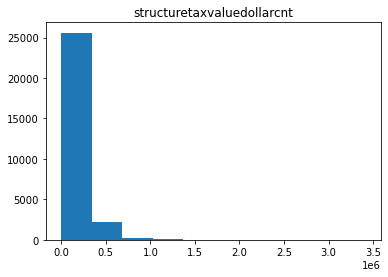

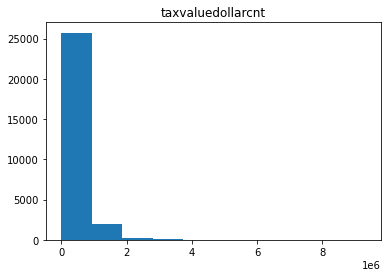

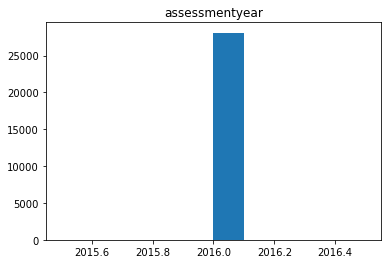

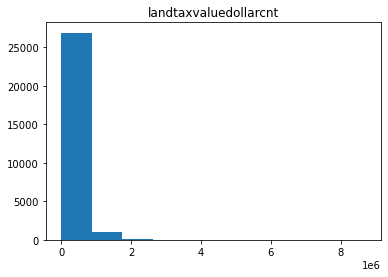

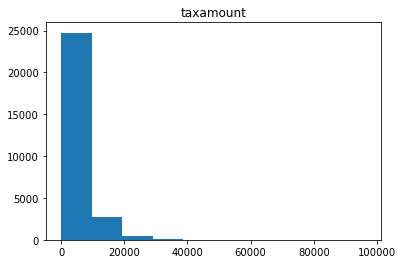

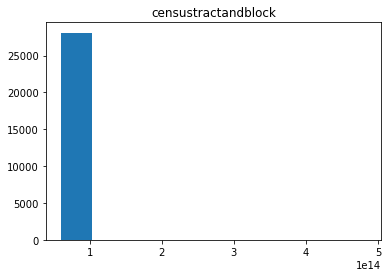

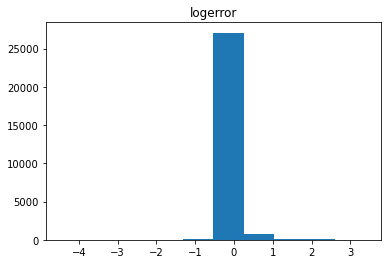

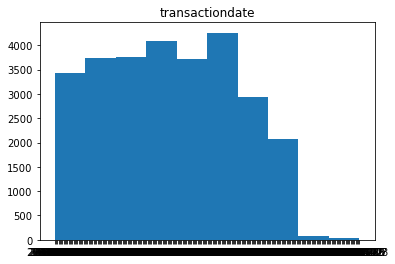

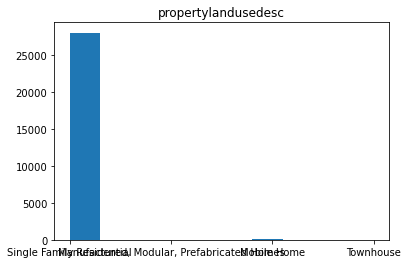

In [9]:
for col in train.columns:
    plt.hist(train[col])
    plt.title(col)
    plt.show()

notes:
- fips: 6037 (LA County) has the most entries. 6059 (Orange County) has the second most entries. 6111 (Ventura County) has the elast entries.
- bedroom count is almost normally distributed. bathroom count is slightly skewed right
- calculatedfinishedsqft is also almost normally distributed
- yearbuilt is almost normally distributed

Exploration note:

visualization for exploration should be fast and informative.
It serves the purpose of elaborating on relationships in your data and potential drivers of your target

In [10]:
# 2. Bivariate:
# - Does logerror score vary across fips

In [11]:
# continous variable: logerror
# categorical variable: fips
# box plot to compare means visually
# do some statistical means testing

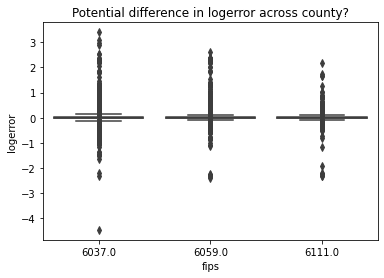

In [12]:
sns.boxplot(train.fips, train.logerror)
plt.title('Potential difference in logerror across county?')
plt.show()

In [13]:
# Null hypothesis: mean_LACounty == mean_OrangeCounty
# presume alpha of 0.05


stats.levene(train[train.fips==6037].logerror, train[train.fips==6059].logerror)

LeveneResult(statistic=22.777819347336138, pvalue=1.8285204299120428e-06)

In [14]:
stats.ttest_ind(train[train.fips==6037].logerror, train[train.fips==6059].logerror, equal_var=False)

Ttest_indResult(statistic=-3.3242253754734907, pvalue=0.0008892761561372208)

we can reject the null hypothesis. there is evidence to suggest a signififfcant difference in the means between the two groups

In [15]:
# 3. Bivariate:
# - Is there a relationship between logerror and bedroom count?

Relationship between bedroom count and logerror(?)


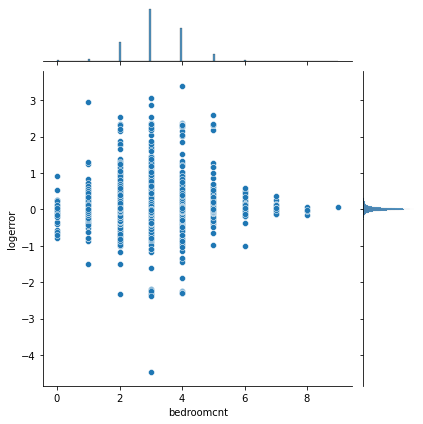

In [16]:
print('Relationship between bedroom count and logerror(?)')
sns.jointplot(x='bedroomcnt', y='logerror', data=train)
plt.xlabel('Bedroom count')
plt.ylabel('Logerror')
plt.show()

In [17]:
# note: looks like we might be able to create clusters from this variable (will explore more to figure out how)
# no noted explicit linear correlation

In [18]:
# 4. Is there a relationship between logerror and bathroom count?

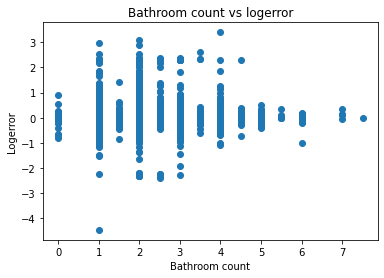

In [19]:
plt.scatter(train.bathroomcnt, train.logerror)
plt.xlabel('Bathroom count')
plt.ylabel('Logerror')
plt.title('Bathroom count vs logerror')
plt.show()

In [20]:
# bin bathroom count
train['bathroomcnt_bin'] = pd.cut(train.bathroomcnt,[0,4,8])

In [21]:
train.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,bathroomcnt_bin
20861,261.0,14327133,1908205,2.5,3.0,2.5,2305.0,2305.0,6059.0,2.0,...,419746.0,1725925.0,2016.0,1306179.0,21899.16,6.059063e+13,0.016509,2017-03-28,Single Family Residential,"(0, 4]"
65249,261.0,12118853,2243290,3.0,3.0,3.0,2746.0,2746.0,6037.0,3.0,...,404440.0,898274.0,2016.0,493834.0,10444.06,6.037463e+13,0.081133,2017-08-10,Single Family Residential,"(0, 4]"
43544,261.0,14158628,861795,1.0,3.0,1.0,1161.0,1161.0,6059.0,1.0,...,40629.0,478000.0,2016.0,437371.0,5528.26,6.059002e+13,-0.018976,2017-06-05,Single Family Residential,"(0, 4]"
589,261.0,13980139,1218864,2.5,4.0,2.5,1550.0,1550.0,6059.0,2.0,...,72897.0,994464.0,2016.0,921567.0,10801.82,6.059063e+13,0.033034,2017-01-04,Single Family Residential,"(0, 4]"
44756,261.0,10917554,837256,2.0,2.0,2.0,1502.0,1502.0,6037.0,2.0,...,142282.0,711411.0,2016.0,569129.0,8601.88,6.037144e+13,0.019062,2017-06-08,Single Family Residential,"(0, 4]"


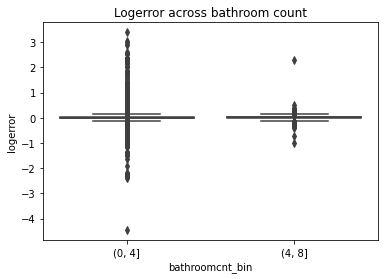

In [22]:
sns.boxplot(train.bathroomcnt_bin, train.logerror)
plt.title('Logerror across bathroom count')
plt.show()

In [23]:
# levene H0 : equal variance across logerror between under 4 group and over 4 group
# alpha = 0.05

stats.levene(train[train.bathroomcnt <= 4].logerror, train[train.bathroomcnt > 4].logerror)

LeveneResult(statistic=0.008217129720944951, pvalue=0.9277726304946721)

In [24]:
# fail to reject the H0, variance is equal

In [25]:
# H0: mean_under_4 == mean_over_4
stats.ttest_ind(train[train.bathroomcnt <= 4].logerror, train[train.bathroomcnt > 4].logerror, equal_var=True)

Ttest_indResult(statistic=-0.3965305037628602, pvalue=0.6917167204105487)

In [26]:
# Fail to reject the null hypothesis: We do not have an implied difference between the bathroom count groups of the logerror
# Conclusion: No difference between the means, no significant r value to be concluded

In [27]:
# multivariate:
# 5. If we control for calculatedfinishedsqft, does logerror differ across tax amount

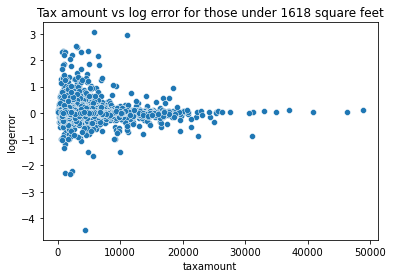

In [28]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet <= 1618])
plt.title('Tax amount vs log error for those under 1618 square feet')
plt.show()

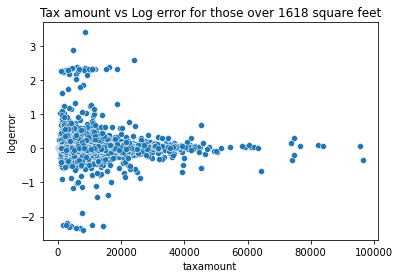

In [29]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet >= 1618])
plt.title('Tax amount vs Log error for those over 1618 square feet')
plt.show()

In [30]:
# possibly negative third degree polynomial relationship on logerror of those over 1618 square feet?

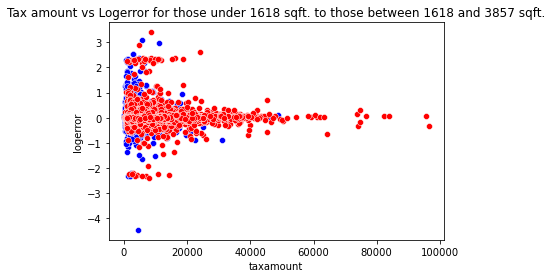

In [31]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet <= 1618], color='blue')
sns.scatterplot(x='taxamount', y='logerror', data=train[(train.calculatedfinishedsquarefeet > 1618) & (train.calculatedfinishedsquarefeet <=3857)], color='red')
plt.title('Tax amount vs Logerror for those under 1618 sqft. to those between 1618 and 3857 sqft.')
plt.show()

In [32]:
# county (fips) affecting this?

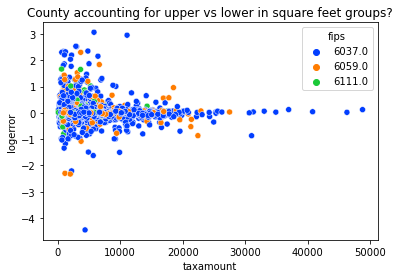

In [33]:
sns.scatterplot(x='taxamount', y='logerror', data=train[train.calculatedfinishedsquarefeet <=1618], hue='fips', palette='bright')
plt.title('County accounting for upper vs lower in square feet groups?')
plt.show()

In [34]:
# possible underlying differences that we have not observed.  Potential 3rd degree polynomial relationship observed earlier in square feet brackets to note

In [35]:
# 6. If we control for bathroom count, does logerror differ across yearbuilt?

In [36]:
train['fullbathcnt_bin'] = pd.cut(train.fullbathcnt, [0, 2, 3, 7])

In [37]:
train.head()

,propertylandusetypeid,parcelid,id,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,...,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc,bathroomcnt_bin,fullbathcnt_bin
20861,261.0,14327133,1908205,2.5,3.0,2.5,2305.0,2305.0,6059.0,2.0,...,1725925.0,2016.0,1306179.0,21899.16,6.059063e+13,0.016509,2017-03-28,Single Family Residential,"(0, 4]","(0, 2]"
65249,261.0,12118853,2243290,3.0,3.0,3.0,2746.0,2746.0,6037.0,3.0,...,898274.0,2016.0,493834.0,10444.06,6.037463e+13,0.081133,2017-08-10,Single Family Residential,"(0, 4]","(2, 3]"
43544,261.0,14158628,861795,1.0,3.0,1.0,1161.0,1161.0,6059.0,1.0,...,478000.0,2016.0,437371.0,5528.26,6.059002e+13,-0.018976,2017-06-05,Single Family Residential,"(0, 4]","(0, 2]"
589,261.0,13980139,1218864,2.5,4.0,2.5,1550.0,1550.0,6059.0,2.0,...,994464.0,2016.0,921567.0,10801.82,6.059063e+13,0.033034,2017-01-04,Single Family Residential,"(0, 4]","(0, 2]"
44756,261.0,10917554,837256,2.0,2.0,2.0,1502.0,1502.0,6037.0,2.0,...,711411.0,2016.0,569129.0,8601.88,6.037144e+13,0.019062,2017-06-08,Single Family Residential,"(0, 4]","(0, 2]"


In [38]:
train.fullbathcnt_bin.value_counts()

(0, 2]    20403
(2, 3]     6313
(3, 7]     1387
Name: fullbathcnt_bin, dtype: int64

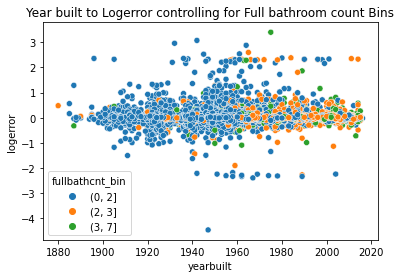

In [39]:
sns.scatterplot(x='yearbuilt', y='logerror', data=train, hue='fullbathcnt_bin')
plt.title('Year built to Logerror controlling for Full bathroom count Bins')
plt.show()

In [40]:
# takeaways: houses in the (2,3) bin for bathrooms seem newer. (0,2) bin has a consistent spread. (3,7) are mostly newer.
# no strong observable correlations

In [41]:
# if you want to do a pairplot with a significant amount of data:
# utilize .sample() to take a randomized subset of` your dataframe

In [50]:
cols = ['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'latitude', 
        'longitude','propertylandusedesc', 'yearbuilt', 'taxvaluedollarcnt', 'bathroomcnt_bin', 'fips']

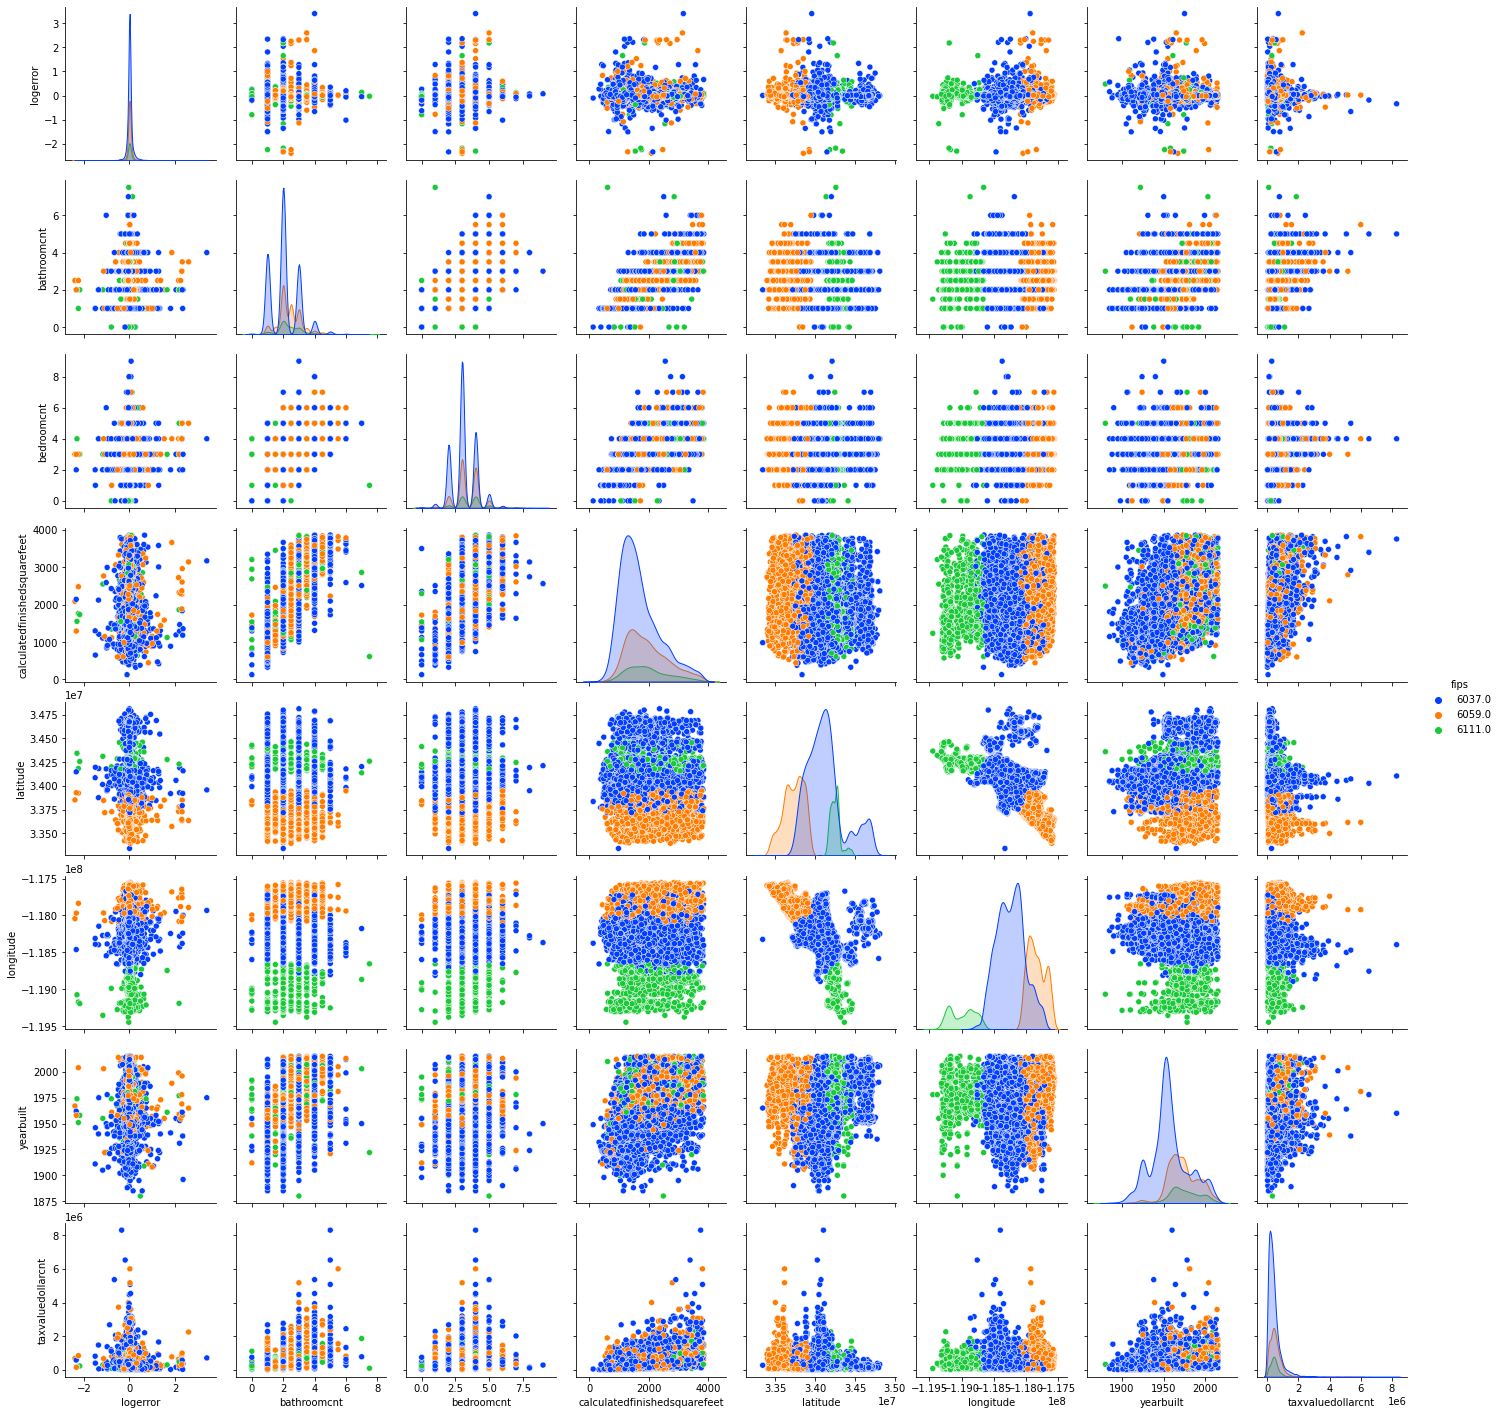

In [52]:
sns.pairplot(data = train[cols].sample(10000), hue='fips', palette='bright')

In [42]:
# Out of what we have observed from our overall questions:
# No notable correlations observed from questions pointed thus far
# significant means difference across county for logerror (drivers not yet known)
# Potential groupings on bathroomcount brackets that could lead to logerror score